<a href="https://colab.research.google.com/github/shaileshsuthar675/Machine-Learning/blob/main/Sklearn%20Datasets/Digit%20Dataset/Sklearn_dataset_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting the google drive into notebook

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Enable the data table for better visualization

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

#Importing respective libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#Importing the predefine dataset from sklearn

In [37]:
from sklearn.datasets import load_digits
digit=load_digits()

In [5]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digit.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

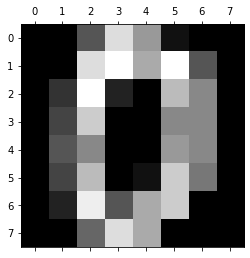

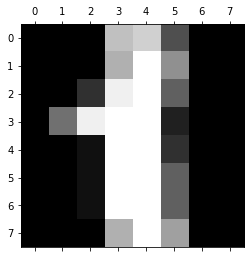

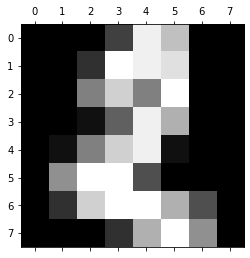

In [9]:
plt.gray()
for i in range(3):
  plt.matshow(digit.images[i])

In [10]:
digit.target[0:5]

array([0, 1, 2, 3, 4])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digit.data,digit.target,test_size=0.2)

In [12]:
len(x_test)

360

In [13]:
len(x_train)

1437

#Developing a Logistic Regration model

In [15]:
from sklearn.linear_model import LogisticRegression
reg=  LogisticRegression()
reg.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [16]:
reg.score(x_test,y_test)

0.9694444444444444

In [ ]:
reg.predict(x_test)

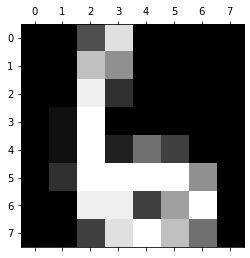

In [22]:
plt.matshow(digit.images[67])

In [24]:
digit.target[67]

6

In [26]:
digit.data[67]

array([ 0.,  0.,  5., 14.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,
        0.,  0.,  0.,  0.,  0., 15.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,
       16.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  2.,  7.,  4.,  0.,
        0.,  0.,  3., 16., 16., 16., 16.,  9.,  0.,  0.,  0., 15., 15.,
        4., 10., 16.,  0.,  0.,  0.,  4., 14., 16., 12.,  7.,  0.])

In [27]:
reg.predict([digit.data[67]])

array([6])

In [29]:
y_pred=reg.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  1,  0,  0,  1,  0],
       [ 1,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 38,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 31,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 34]])

In [32]:
cm.shape[0]

10

In [33]:
sum=0
t_sum=0
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    if i==j:
      sum=sum+cm[i][j]
    else:
      t_sum=t_sum+cm[i][j]
score=sum/(sum+t_sum)

In [34]:
score

0.9694444444444444

Text(69.0, 0.5, 'True')

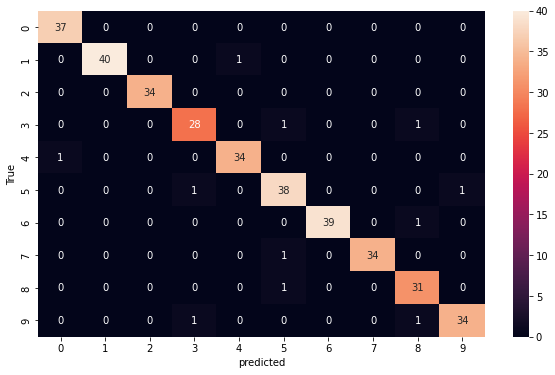

In [36]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('True')